<a href="https://colab.research.google.com/github/drawcodeboy/study_py_packages/blob/main/firstMLDL_02_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1] * 35 + [0] * 14

In [5]:
from sklearn.neighbors import KNeighborsClassifier

train_input = fish_data[:35]
train_target = fish_target[:35]
test_input = fish_data[35:]
test_target = fish_target[35:]

In [10]:
kn = KNeighborsClassifier()

kn.fit(train_input, train_target)
kn.score(test_input, test_target)

# Accuracy = 0.0
# Accyracy가 잘못된 이유는 Train Data를 앞에서 35개, Test Data를 나머지 14개로
# 분리했을 때, Train Data에는 빙어 데이터가 하나도 없기 때문이다.

# 이러한 현상을 Sampling Bias(샘플링 편향)이라고 한다.
# 즉, 샘플들이 골고루 섞이지 않고, 한 쪽으로 치우쳤다는 뜻이다.

0.0

In [11]:
# 골고루 섞기 위해 numpy를 사용해보자.

import numpy as np

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

# 주의할 점은 input_arr와 target_arr가 같은 위치는 함께 선택되어야 한다는 것이다.

np.random.seed(42)
index = np.arange(len(fish_data))
np.random.shuffle(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [12]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

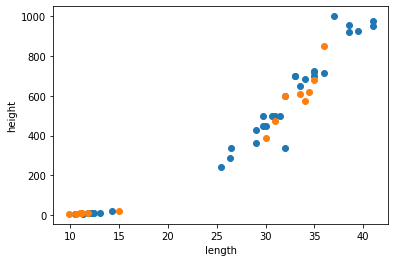

In [14]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('length')
plt.ylabel('height')
plt.show()

# numpy의 random 메서드를 사용하여 잘 섞인 것을 알 수 있다.

In [16]:
kn2 = KNeighborsClassifier()

kn2.fit(train_input, train_target)
kn2.score(test_input, test_target)

1.0

In [18]:
kn2.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [19]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])